<a href="https://colab.research.google.com/github/ksaiyan/Kaggle-Problems/blob/main/Fake_News_Kaggle_LSTM_Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEP LEARNING ASSIGNMENT Q1 GROUP 210**

KAPIL SRIVATSAN - 2020FC04951

NAVEEN KUMAR K - 2020fc04932

SARATH - 2020FC04928

In [ ]:

from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import plotly.express as pe
import plotly.figure_factory as ff
import re
from wordcloud import WordCloud
import nltk, re, pprint, string
from nltk import word_tokenize, sent_tokenize
from pandas.core.missing import pad_1d
pd.set_option('display.max_columns', None)
import gensim
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

***ANALYSING TRUE.CSV DATASET***

---



In [ ]:
#!ls gdrive/MyDrive/Colab_Notebooks/DL_Assignment

#/content/drive/MyDrive/Colab_Notebooks/DL_Assignment/Fake.csv

data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/DL_Assignment/True.csv")


true_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/DL_Assignment/True.csv")

#fake_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/DL_Assignment/Fake.csv")


In [ ]:

true_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:

#Getting Total Rows
#print(f"Total Records and Columns:{fake_data.shape}")
print('\n True Data')
print(true_data.info())



 True Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [ ]:

true_data.describe()

title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182

***DATA VISUALIZATION FOR TRUE.CSV AND ANALYSING TOP STOP WORDS***

True Data subject counts


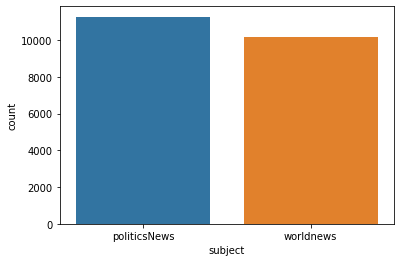

True Data distinct subject column values /n


array(['politicsNews', 'worldnews'], dtype=object)

In [ ]:
print('True Data subject counts')
sns.countplot(x="subject", data=true_data)
plt.show()

print('True Data distinct subject column values /n')
true_data.subject.unique()

True Data Date counts


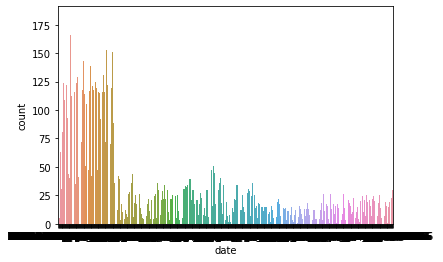

In [ ]:
print('True Data Date counts')
sns.countplot(x="date", data=true_data)
plt.show()

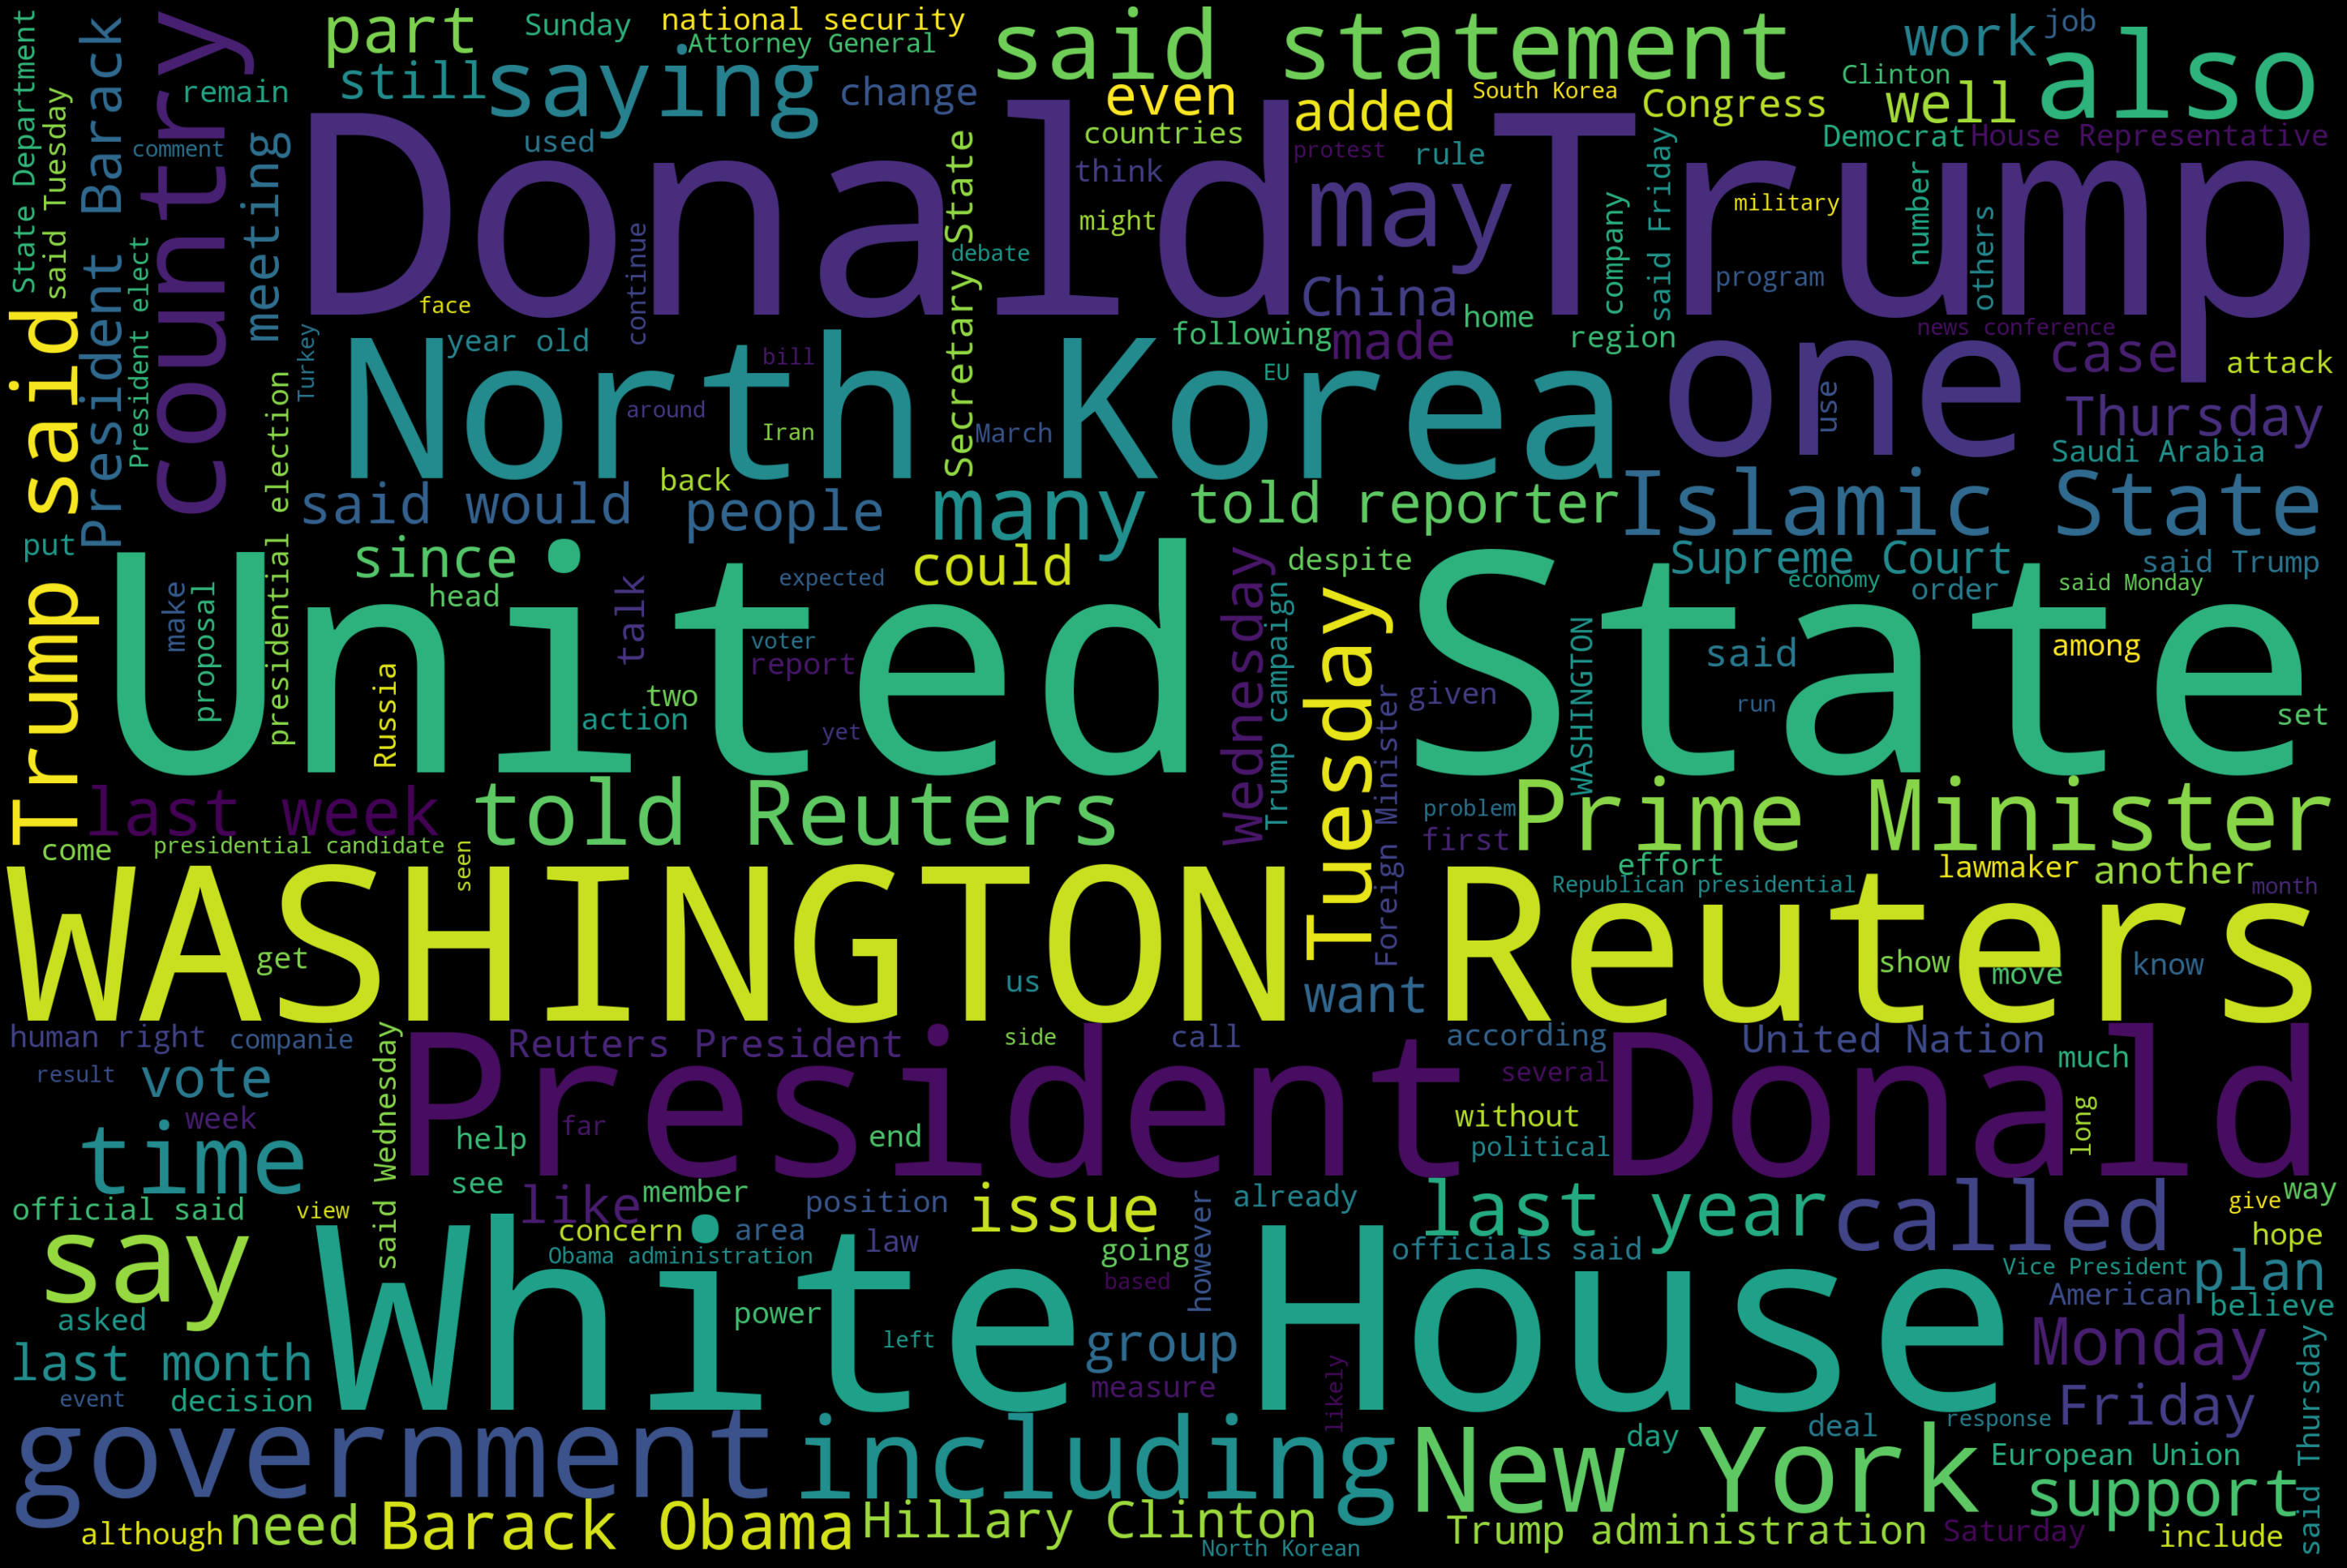

In [ ]:
### TRUE DATA :Most frequently used words via WordCloud###
text = ''
for news in true_data.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

***DATA PRE-PROCESSING***

In [ ]:
##Checking for null values for each column value

print([index for index,text in enumerate(true_data.title.values) if str(text).strip() == ''])

print([index for index,text in enumerate(true_data.text.values) if str(text).strip() == ''])

print([index for index,text in enumerate(true_data.subject.values) if str(text).strip() == ''])

print([index for index,text in enumerate(true_data.date.values) if str(text).strip() == ''])


[]
[8970]
[]
[]


In [ ]:
##Dropping null value on text as it does not help

true_data = true_data.drop(8970, axis=0)

In [ ]:
##Shape of True News Dataset
print(f"Total Records:\t{true_data.shape[0]}")


for i,count in true_data.subject.value_counts().iteritems():
  print(f"{i}:\t{count}")

Total Records:	21416
politicsNews:	11271
worldnews:	10145


In [ ]:
# Adding class Information
true_data["class"] = 1
true_data["text"] = true_data["title"] + " " + true_data["text"]
true_data = true_data.drop(["date","title"], axis=1)


In [ ]:
true_data.head()

text subject  class
0   Donald Trump Sends Out Embarrassing New Year’...    News      0
1   Drunk Bragging Trump Staffer Started Russian ...    News      0
2   Sheriff David Clarke Becomes An Internet Joke...    News      0
3   Trump Is So Obsessed He Even Has Obama’s Name...    News      0
4   Pope Francis Just Called Out Donald Trump Dur...    News      0

***ANALYSING FAKE.CSV DATASET***

---



In [ ]:
fake_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/DL_Assignment/Fake.csv")

fake_data.head()


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
fake_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
fake_data.describe()

title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46

***DATA VISUALISATIONS FOR FAKE.CSV***

Fake Data subject counts


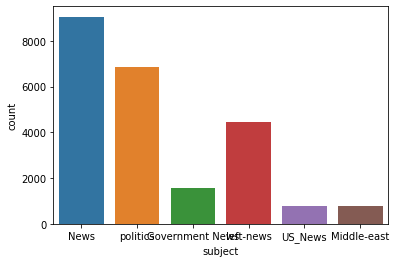

Fake Data distinct subject column values
Fake Data Date counts


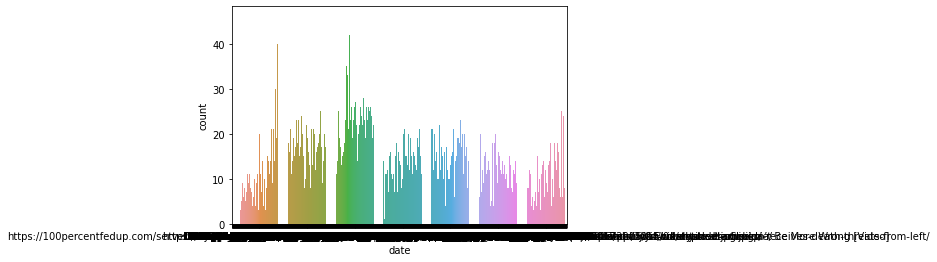

In [ ]:
print('Fake Data subject counts')
sns.countplot(x="subject", data=fake_data)
plt.show()

print('Fake Data distinct subject column values')
fake_data.subject.unique()

print('Fake Data Date counts')
sns.countplot(x="date", data=fake_data)
plt.show()

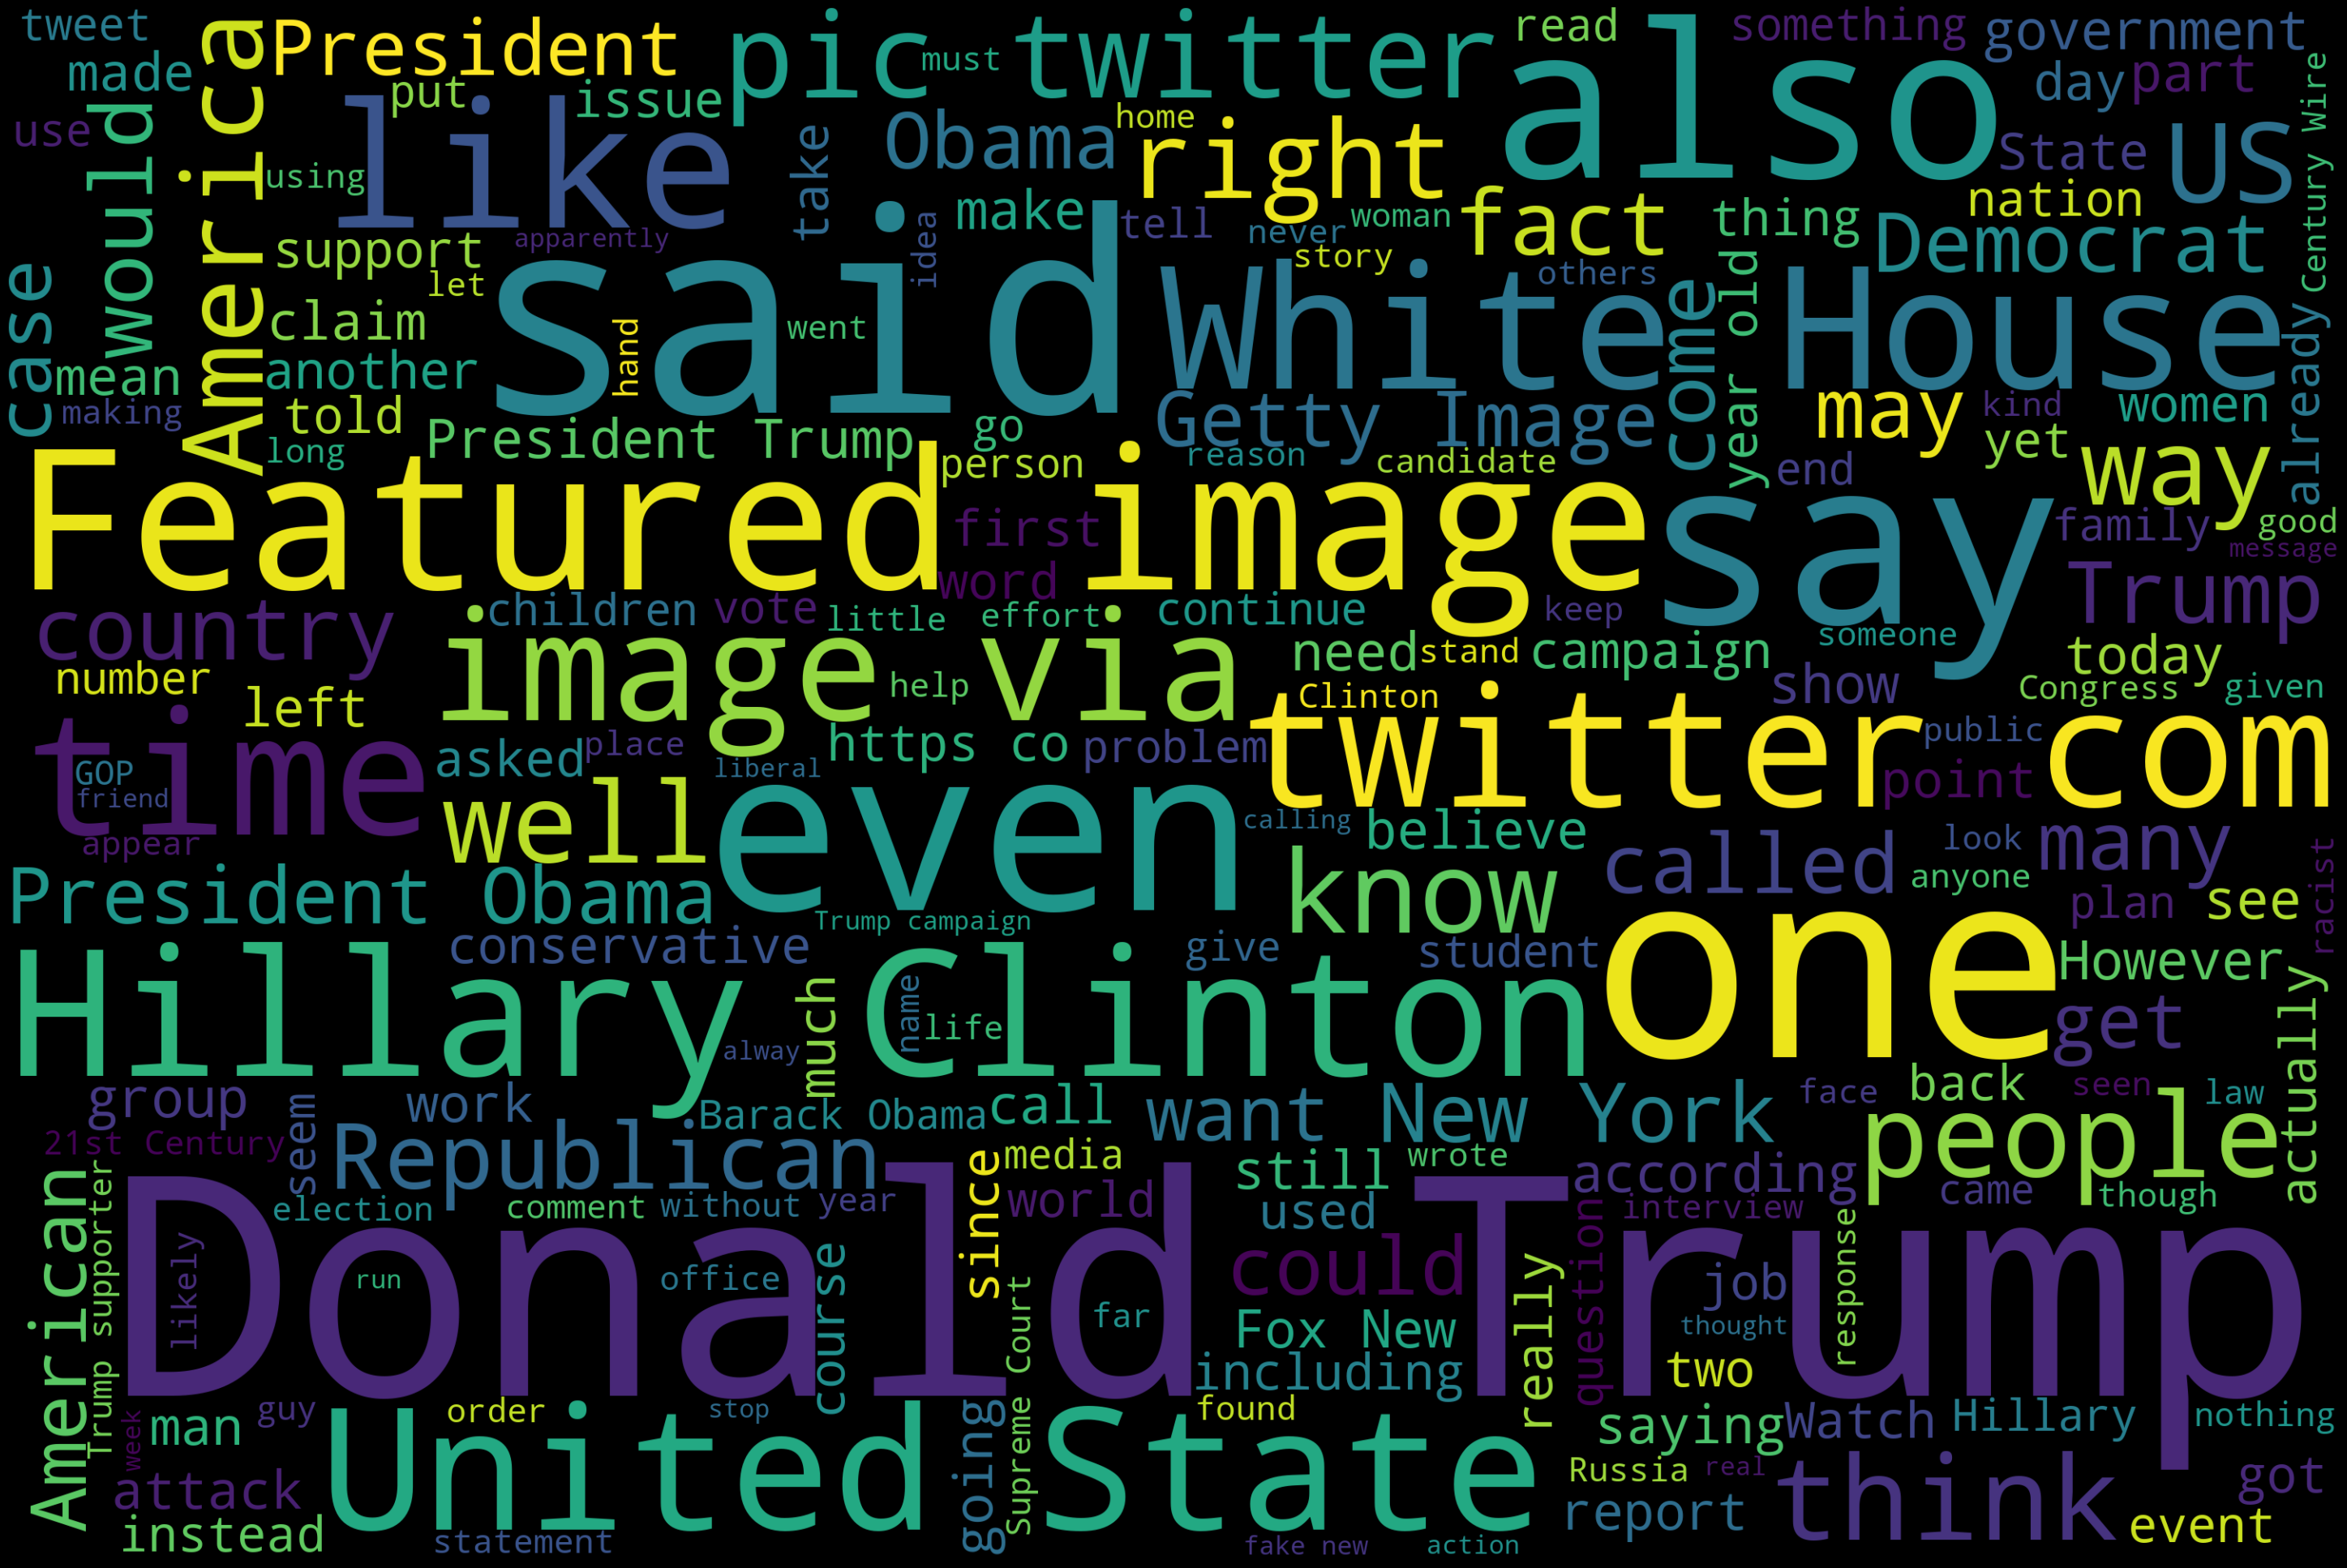

In [ ]:
### FAKE DATA :Most frequently used words via WordCloud###
text = ''
for news in fake_data.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

***DATA PRE-PROCESSING ON FAKE.CSV***

In [ ]:
##Checking for null values for each column value

print([index for index,text in enumerate(fake_data.title.values) if str(text).strip() == ''])

print([index for index,text in enumerate(fake_data.text.values) if str(text).strip() == ''])

print([index for index,text in enumerate(fake_data.subject.values) if str(text).strip() == ''])

print([index for index,text in enumerate(fake_data.date.values) if str(text).strip() == ''])



[]
[10923, 11041, 11190, 11225, 11236, 11241, 11247, 11249, 11267, 11268, 11283, 11284, 11285, 11289, 11290, 11292, 11295, 11296, 11301, 11303, 11304, 11305, 11309, 11314, 11317, 11319, 11322, 11330, 11334, 11335, 11340, 11343, 11348, 11351, 11352, 11357, 11371, 11373, 11374, 11382, 11397, 11402, 11403, 11409, 11410, 11412, 11415, 11419, 11421, 11427, 11431, 11432, 11440, 11448, 11450, 11453, 11462, 11464, 11465, 11472, 11473, 11475, 11478, 11489, 11491, 11493, 11494, 11501, 11505, 11507, 11520, 11531, 11532, 11533, 11538, 11542, 11547, 11549, 11551, 11559, 11563, 11581, 11585, 11589, 11590, 11614, 11624, 11625, 11627, 11631, 11636, 11637, 11643, 11650, 11658, 11661, 11672, 11679, 11681, 11684, 11686, 11688, 11692, 11708, 11718, 11729, 11739, 11753, 11765, 11768, 11777, 11782, 11786, 11788, 11792, 11793, 11803, 11806, 11813, 11821, 11831, 11832, 11841, 11844, 11848, 11854, 11858, 11860, 11863, 11866, 11872, 11874, 11875, 11879, 11881, 11884, 11889, 11893, 11900, 11904, 11906, 11913, 11

In [ ]:
# checking for null values in fake.csv data and dropping them
null_index = [index for index,text in enumerate(fake_data.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(null_index)}")

fake_data = fake_data.drop(null_index, axis=0)


No of empty rows: 630


In [ ]:
# checking for null values in fake.csv data and dropping them
null_index = [index for index,text in enumerate(fake_data.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(null_index)}")

No of empty rows: 0


In [ ]:
# Adding class Information
fake_data["class"] = 0
fake_data["text"] = fake_data["title"] + " " + fake_data["text"]
fake_data = fake_data.drop(["date","title"], axis=1)


***COMBINING AND COMPUTING MODEL ACCURACY FOR TRUE AND FAKE DATASETS. ADDED CLASS VALUES AS 0 OR 1 FOR FAKE AND TRUE NEWS RESPECTIVELY***

---



In [ ]:
data = true_data.append(fake_data, ignore_index=True)

data.head()

text       subject  class
0  As U.S. budget fight looms, Republicans flip t...  politicsNews      1
1  U.S. military to accept transgender recruits o...  politicsNews      1
2  Senior U.S. Republican senator: 'Let Mr. Muell...  politicsNews      1
3  FBI Russia probe helped by Australian diplomat...  politicsNews      1
4  Trump wants Postal Service to charge 'much mor...  politicsNews      1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44268 entries, 0 to 44267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     44268 non-null  object
 1   subject  44268 non-null  object
 2   class    44268 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


***TOKENIZING EACH WORDS AND PERFORMING VECTORIZATION USING WORD2VEC***

In [ ]:
y = data["class"].values

X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)



In [ ]:
#Defining the dimension of vectors that will be generated
EMBEDDING_DIM = 100

#Creating vectors for the news text
v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
##Testing out on different corpus words on vector to see their corresponding word sentences and their respective vector values
print('length of the vector model :',len(v_model.wv.vocab))
print(v_model.wv.most_similar("president"))
print(v_model.wv.most_similar("trump"))
print(v_model.wv.most_similar("corona"))
print(v_model.wv.most_similar("clinton"))
print(v_model.wv.most_similar("obama"))

length of the vector model : 122359
[('presidency', 0.6106013059616089), ('inertial', 0.6074928641319275), ('successor', 0.543912410736084), ('presidents', 0.5406063199043274), ('presidential', 0.5146723985671997), ('versa', 0.5143793821334839), ('administration', 0.5033806562423706), ('trump', 0.461974561214447), ('predecessor', 0.45686957240104675), ('l4n1n304g', 0.4492051303386688)]
[('elect', 0.5944536924362183), ('cruz', 0.5513746738433838), ('ridiculous', 0.49069273471832275), ('conway', 0.4881547689437866), ('outright', 0.4864254295825958), ('hillary', 0.48319578170776367), ('rubio', 0.4814143180847168), ('obama', 0.4720769226551056), ('course', 0.4707307815551758), ('yve22mg8to', 0.4694417715072632)]
[('punjabi', 0.7384289503097534), ('zacaria', 0.7377269268035889), ('jccxnnjhdk', 0.7348566055297852), ('knavs', 0.7343505620956421), ('benghalem', 0.7321789264678955), ('decadt', 0.7309113144874573), ('hashemite', 0.7303606867790222), ('adebolajo', 0.7279913425445557), ('pahlevi',

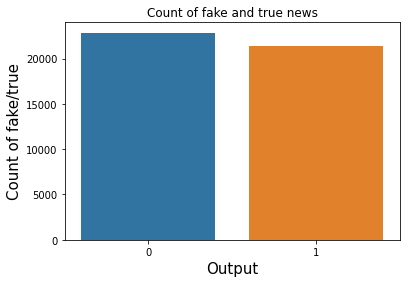

In [ ]:
##Counts of True news and Fake news
ax=sns.countplot(x="class", data=data)


ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

In [ ]:
# Tokenizing each word of the text. Giving unique number to each of them

#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [ ]:
#check word to numerical replesentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 50:
        break     

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
new -> 8
obama -> 9
also -> 10
house -> 11
clinton -> 12
reuters -> 13
government -> 14
donald -> 15
states -> 16
republican -> 17
year -> 18
white -> 19
could -> 20
united -> 21
told -> 22
like -> 23
election -> 24
campaign -> 25
two -> 26
time -> 27
news -> 28
party -> 29
last -> 30
first -> 31
hillary -> 32
washington -> 33
former -> 34
country -> 35
even -> 36
us -> 37
video -> 38
media -> 39
years -> 40
says -> 41
may -> 42
security -> 43
many -> 44
american -> 45
law -> 46
court -> 47
police -> 48
russia -> 49
say -> 50


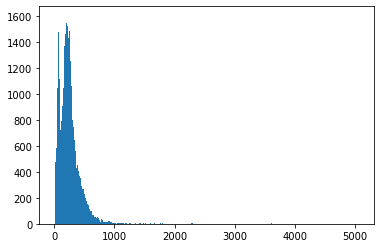

In [ ]:
plt.hist([len(x) for x in X], bins=500)
plt.show()

##Dataset is highly skewed. Need to remove the outliers. Few data with more than 5000 words

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])

#Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlen = 700 

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
#all news has 700 words (in numerical form now). If they had less words, they have been padded with 0
# 0 is not associated to any word, as mapping of words started from 1
# 0 will also be used later, if unknows word is encountered in test set
len(X[0])

700

In [ ]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(v_model, word_index)

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          12236000  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 12,353,377
Trainable params: 117,377
Non-trainable params: 12,236,000
_________________________________________________________________


In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
727/727 [==============================] - 90s 124ms/step - loss: 0.0328 - acc: 0.9897 - val_loss: 0.0196 - val_acc: 0.9945
Epoch 2/10
727/727 [==============================] - 90s 124ms/step - loss: 0.0225 - acc: 0.9944 - val_loss: 0.0175 - val_acc: 0.9957
Epoch 3/10
727/727 [==============================] - 90s 124ms/step - loss: 0.0131 - acc: 0.9966 - val_loss: 0.0148 - val_acc: 0.9961
Epoch 4/10
727/727 [==============================] - 90s 124ms/step - loss: 0.0088 - acc: 0.9978 - val_loss: 0.0100 - val_acc: 0.9971
Epoch 5/10
727/727 [==============================] - 90s 124ms/step - loss: 0.0066 - acc: 0.9982 - val_loss: 0.0095 - val_acc: 0.9977
Epoch 6/10
727/727 [==============================] - 90s 123ms/step - loss: 0.0058 - acc: 0.9983 - val_loss: 0.0119 - val_acc: 0.9974
Epoch 7/10
727/727 [==============================] - 90s 124ms/step - loss: 0.0105 - acc: 0.9968 - val_loss: 0.0120 - val_acc: 0.9974
Epoch 8/10
727/727 [==============================] - 9

In [ ]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("float")

In [ ]:
accuracy_score(y_test, y_pred)

0.9982831842414385

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5718
           1       1.00      1.00      1.00      5349

    accuracy                           1.00     11067
   macro avg       1.00      1.00      1.00     11067
weighted avg       1.00      1.00      1.00     11067



In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.5750182837497095
Decision Tree Test Accuracy: 0.8418011277182054
KNN Test Accuracy: 0.6224121055622305
Naive Bayes Test Accuracy: 0.5716058904448945


***LOGISTIC REGRESSION WITH HYPER PARAMETER***

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.0004498432668969444, random_state=0)
The mean accuracy of the model is: 0.5868799132556248


***CONCLUSION***

---



LSTM offers the best accuracy using the vectorization function. Logistic, KNN and Naive Bayes clearly do not work well. Decision tree can be optimized. But LSTM using vectorization and stemming is the best approach with astounding accuracy of over ***99%***


***LSTM : *** Feature selection by combining both text and title columns. Removed data skewness by eliminating news with over 700 words. Tuned the data by dropping column values. Data is thoroughly analyzed, cleaned, vectorized and fed into the LSTM Network. Fully optimized and tuned with the help of tokenization, vectorization , stemming and much more..
Accuracy : 99%

***Logistic : *** Accuracy is less. Hyper-Parametrized for better efficiency. Not as efficient as LSTM because of data skewness and complexity. Can work well with numeric or categorical data columns but not on large random texts. 
Accuracy : 57.5%

***Naive Bayes : *** Accuracy is less.Not as efficient as LSTM because of data skewness and complexity. Can work well with numeric or categorical data columns but not on large random texts. 
Accuracy : 57.5%

***Decision Trees : *** Decent accuracy. Can be further optimized to increase it over 90% by verifying features and tuning. Might work better with Random Forest Algorithm. Still very much inferior to LSTM network.
Accurary : 84.11%